# Шапетин Максим ИНС-б-о-22-1

# Управление количественными данными

Подключение библиотеки

In [18]:
import pandas as pd
import numpy as np

## Масштабирование признака

Для масштабирования признака будем использовать MinMaxScaler библиотеки scikit-learn

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Пример данных
data = {'feature1': [5, 10, 15, 20, 25],
        'feature2': [100, 150, 200, 250, 300]}
df = pd.DataFrame(data)

# Масштабирование (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

# Масштабирование (Standard Scaling)
standard_scaler = StandardScaler()
df_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

print("Scaled (Min-Max):\n", df_scaled_minmax)
print("\nScaled (Standard):\n", df_scaled_standard)


Scaled (Min-Max):
    feature1  feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00

Scaled (Standard):
    feature1  feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


## Стандартизация признака

In [19]:
# Стандартизация признаков (Z-score)
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("Standardized Data:\n", df_standardized)

Standardized Data:
    feature1  feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


## Нормализация наблюдаемых данных

In [20]:
# Нормализация с использованием MinMaxScaler
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("Normalized Data:\n", df_normalized)

Normalized Data:
    feature1  feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


## Генерирование полиномиальных и взаимодействующих признаков

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Генерация полиномиальных признаков (2 степени)
poly = PolynomialFeatures(degree=2)
df_poly = pd.DataFrame(poly.fit_transform(df), columns=poly.get_feature_names_out(df.columns))

print("Polynomial Features:\n", df_poly)

Polynomial Features:
      1  feature1  feature2  feature1^2  feature1 feature2  feature2^2
0  1.0       5.0     100.0        25.0              500.0     10000.0
1  1.0      10.0     150.0       100.0             1500.0     22500.0
2  1.0      15.0     200.0       225.0             3000.0     40000.0
3  1.0      20.0     250.0       400.0             5000.0     62500.0
4  1.0      25.0     300.0       625.0             7500.0     90000.0


## Преобразование признаков

In [22]:
import numpy as np

# Применение логарифмического преобразования
df_log_transformed = df.copy()
df_log_transformed['feature1'] = np.log1p(df_log_transformed['feature1'])
print("Log-transformed Data:\n", df_log_transformed)

Log-transformed Data:
    feature1  feature2
0  1.791759       100
1  2.397895       150
2  2.772589       200
3  3.044522       250
4  3.258097       300


## Обнаружение выбросов

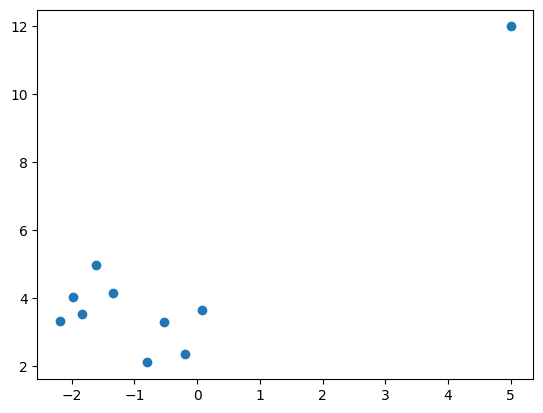

In [24]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# Создаем облако точек
features, _ = make_blobs(n_samples=10,
                         n_features=2,
                         centers=1,
                         random_state=1)

# Создадим выбросы
features[1, 0] = 5
features[1, 1] = 12

# Выполним визуализацию выбросов
plt.scatter(features[:,0].reshape(10,1),
            features[:,1].reshape(10,1))

In [25]:
# Создадим детектор выбросов
detector = EllipticEnvelope(contamination=0.1)
# Обучение детектора
detector.fit(features)

# Предсказание выбросов
detector.predict(features)

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

## Управление выбросами

In [29]:
data = pd.DataFrame()
data['Номер'] = [71, 81, 15, 27]
data['Цена'] = [50_000, 900_000, 5_000, 70_000]
data['Позиция'] = [1, 2, 1, 25]
data

,Номер,Цена,Позиция
0,71,50000,1
1,81,900000,2
2,15,5000,1
3,27,70000,25


Способ 1. Выполним фильтрацию данных, удалив явно лишний объект недвижимости с большой площадью

In [30]:
data[data['Цена'] < 100_000]

,Номер,Цена,Позиция
0,71,50000,1
2,15,5000,1
3,27,70000,25


Способ 2. Добавим новый столбец и пометим выбросы

In [31]:
data['Выбросы'] = np.where(data['Цена'] < 100_000, 0, 1)
data

,Номер,Цена,Позиция,Выбросы
0,71,50000,1,0
1,81,900000,2,1
2,15,5000,1,0
3,27,70000,25,0


Способ 3. Преобразование "выпирающего" признака для сглаживания его влияния (например логарифмирование)

In [32]:
data['Log_Цена'] = [np.log(x) for x in data['Цена']]
data

,Номер,Цена,Позиция,Выбросы,Log_Цена
0,71,50000,1,0,10.819778
1,81,900000,2,1,13.710150
2,15,5000,1,0,8.517193
3,27,70000,25,0,11.156251


## Дискретизация признаков

Способ 1. Бинаризация (разделение относительно порогового значения)

In [33]:
from sklearn.preprocessing import Binarizer

age = np.array([12,15,18,24,25,45,30,34])
N = age.shape[0]
age=age.reshape(N,1)

# Определение объекта для бинаризации
binarizer = Binarizer(threshold=18)

binarizer.fit_transform(age).reshape(N)

array([0, 0, 0, 1, 1, 1, 1, 1])

Способ 2. Использование нескольких пороговых значений

In [34]:
np.digitize(age, bins=[18, 30, 50]).reshape(N)

array([0, 0, 1, 1, 1, 2, 2, 2])

## Группировка наблюдений при помощи кластеризации

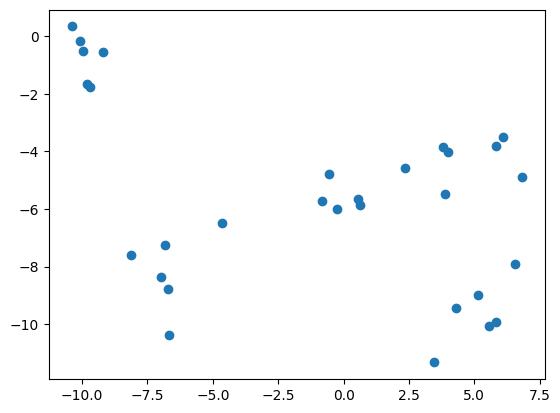

In [39]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# Создаем несколько групп объектов с двумя признаками
N = 30
data, _ = make_blobs(n_samples=N,
                         n_features=4,
                         centers=5,
                         random_state=10)


# Выполним визуализацию набора данных
plt.scatter(data[:,0].reshape(N,1),
            data[:,1].reshape(N,1))

Выполним кластеризацию

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


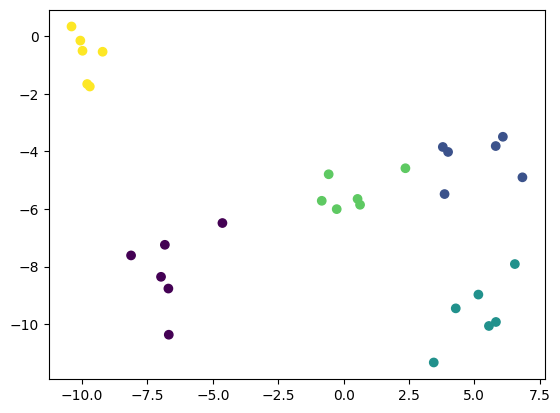

In [40]:
from sklearn.cluster import KMeans

# Создание DataFrame
datafr = pd.DataFrame(data, columns=["X", "Y", "Z", "W"])

# Создание механизма кластеризации
clusterer = KMeans(5, random_state=1)

# Настройка кластеризации
clusterer.fit(datafr)

# Предсказание значений кластера
datafr["group"] = clusterer.predict(data)
plt.scatter(datafr["X"], datafr["Y"], c=datafr["group"])

## Удаление элементов с отсутствующим значением

In [41]:
features = np.array([[0.5, 1.0],
                    [1.5, 1.0],
                    [34.005, 13.98],
                    [3.11, np.nan],
                    [30.54, 71.0771],
                    [np.nan, 9.045]])

# Нахождение объектов с NaN-признаками
print(features[np.isnan(features).any(axis=1)])

# Удаление объектов из выборки
features = features[~np.isnan(features).any(axis=1)]
print(features)

[[3.11    nan]
 [  nan 9.045]]
[[ 0.5     1.    ]
 [ 1.5     1.    ]
 [34.005  13.98  ]
 [30.54   71.0771]]
